In [1]:
import keras

Using TensorFlow backend.


In [2]:
import keras
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import array_to_img, img_to_array, list_pictures, load_img
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("data_all.csv")
# df.head()

In [4]:
x, t = [], []

In [5]:
for (i, row) in df.iterrows():
    filepath = row['filepath']
    tmp_img = load_img(filepath, target_size=(32,32))
    img = img_to_array(tmp_img) / 255.0 # -> float32 + 正規化
    
    # データに追加
    x.append(img)
    t.append(row['label'])

In [6]:
# numpyに変換
x = np.array(x, 'f')

In [7]:
# x.shape

In [8]:
# クラスの形式を変換 <- one-hot表現
t = np_utils.to_categorical(t, 2)

In [9]:
# 学習用データとテストデータ
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.33, random_state=1)

In [10]:
# CNNを構築
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))       # クラスは2個
model.add(Activation('softmax'))

# コンパイル
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

# 実行。出力はなしで設定(verbose=0)。
history = model.fit(x_train, t_train, batch_size=30, epochs=50,
                   validation_data = (x_test, t_test))

Train on 824 samples, validate on 406 samples
Epoch 1/50
824/824 [==============================] - 5s 6ms/step - loss: 0.8708 - acc: 0.5291 - val_loss: 0.7208 - val_acc: 0.5394
Epoch 2/50
824/824 [==============================] - 4s 5ms/step - loss: 0.6416 - acc: 0.6262 - val_loss: 0.6389 - val_acc: 0.6552
Epoch 3/50
824/824 [==============================] - 4s 5ms/step - loss: 0.5861 - acc: 0.6966 - val_loss: 0.6379 - val_acc: 0.6749
Epoch 4/50
824/824 [==============================] - 4s 5ms/step - loss: 0.5350 - acc: 0.7318 - val_loss: 0.6245 - val_acc: 0.6700
Epoch 5/50
824/824 [==============================] - 4s 5ms/step - loss: 0.4950 - acc: 0.7597 - val_loss: 0.6254 - val_acc: 0.6700
Epoch 6/50
824/824 [==============================] - 4s 5ms/step - loss: 0.4499 - acc: 0.7852 - val_loss: 0.6981 - val_acc: 0.6502
Epoch 7/50
824/824 [==============================] - 4s 5ms/step - loss: 0.4133 - acc: 0.8095 - val_loss: 0.6439 - val_acc: 0.6478
Epoch 8/50
824/824 [==========

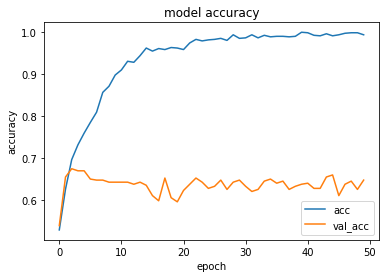

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()